In [ ]:
#import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
data=pd.read_csv("/content/drive/MyDrive/datasets/archive (3)/amazon_sales_2025_INR.csv")
data

,Order_ID,Date,Customer_ID,Product_Category,Product_Name,Quantity,Unit_Price_INR,Total_Sales_INR,Payment_Method,Delivery_Status,Review_Rating,Review_Text,State,Country
0,ORD100000,2025-01-25,CUST2796,Home & Kitchen,Cookware Set,2,25574.41,51148.82,Credit Card,Returned,1,Waste of money,Sikkim,India
1,ORD100001,2025-08-28,CUST9669,Beauty,Hair Dryer,1,19361.41,19361.41,Debit Card,Returned,5,Excellent product!,Telangana,India
2,ORD100002,2025-02-27,CUST5808,Electronics,Tablet,3,38476.22,115428.66,Cash on Delivery,Delivered,3,Fair deal,Nagaland,India
3,ORD100003,2025-02-24,CUST5889,Electronics,Headphones,5,38145.72,190728.60,Credit Card,Delivered,5,Highly recommend!,Assam,India
4,ORD100004,2025-06-15,CUST9005,Clothing,Saree,5,45940.98,229704.90,UPI,Delivered,5,Highly recommend!,Odisha,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,ORD114995,2025-04-12,CUST2822,Beauty,Lipstick,4,36421.54,145686.16,UPI,Delivered,1,Never buying again,Gujarat,India
14996,ORD114996,2025-08-29,CUST6143,Beauty,Shampoo,4,18158.02,72632.08,Debit Card,Delivered,4,Satisfied with the product,Meghalaya,India
14997,ORD114997,2025-01-27,CUST6747,Books,Science Textbook,1,38864.05,38864.05,UPI,Delivered,1,Waste of money,Sikkim,India
14998,ORD114998,2025-06-21,CUST2748,Beauty,Hair Dryer,3,32658.62,97975.86,Cash on Delivery,Pending,3,Okay product,Himachal Pradesh,India


DESCRIPTION ABOUT THE DATA:

---

The Online Sales Dataset contains transactional data collected from an e-commerce platform. It records details of customer purchases made through an online website over a specific time period. The dataset helps analyze sales performance, customer's review rating and  product demand

In [ ]:
#check data information features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          15000 non-null  object 
 1   Date              15000 non-null  object 
 2   Customer_ID       15000 non-null  object 
 3   Product_Category  15000 non-null  object 
 4   Product_Name      15000 non-null  object 
 5   Quantity          15000 non-null  int64  
 6   Unit_Price_INR    15000 non-null  float64
 7   Total_Sales_INR   15000 non-null  float64
 8   Payment_Method    15000 non-null  object 
 9   Delivery_Status   15000 non-null  object 
 10  Review_Rating     15000 non-null  int64  
 11  Review_Text       15000 non-null  object 
 12  State             15000 non-null  object 
 13  Country           15000 non-null  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.6+ MB


In [ ]:
#check data unique values
data.nunique()

,0
Order_ID,15000
Date,365
Customer_ID,7259
Product_Category,5
Product_Name,25
Quantity,5
Unit_Price_INR,14981
Total_Sales_INR,14988
Payment_Method,4
Delivery_Status,3


SUMMARY OF FEATURES:

---

The online sales dataset consists of various features that capture complete information about e-commerce transactions. It includes order details such as order ID and order date, customer information like customer ID and location, and product-related attributes including product ID, product name, and product category. The dataset also contains numerical features such as quantity sold, unit price,  total sales amount,  which help in analyzing revenue and business performance. In addition, categorical features like payment method and order status provide insights into customer preferences and delivery outcomes.


---




DATA CLEANING

In [ ]:
#checking null values
data.isnull().sum()

,0
Order_ID,0
Date,0
Customer_ID,0
Product_Category,0
Product_Name,0
Quantity,0
Unit_Price_INR,0
Total_Sales_INR,0
Payment_Method,0
Delivery_Status,0


SUMMARY FOR NULL VALUES:

---
From the above code,we have no null values for the features.

In [ ]:
#checking duplicates
data.duplicated().sum()

np.int64(0)

In [ ]:
#checking duplicates for ordered id
data["Order_ID"].duplicated().sum()

np.int64(0)

In [ ]:
#checking duplicates for cutomer id
data["Customer_ID"].duplicated().sum()

np.int64(7741)

SUMMARY FOR DUPLICATES VALUES:



---
From the above code ,we have no duplicate values for Order ID but we have duplicate values for Cutomer ID because same cutomer can buy the product repeatedly.


In [ ]:
#checking the country column
a=data.groupby("Country").count()
a

,Order_ID,Date,Customer_ID,Product_Category,Product_Name,Quantity,Unit_Price_INR,Total_Sales_INR,Payment_Method,Delivery_Status,Review_Rating,Review_Text,State
Country,,,,,,,,,,,,,
India,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000


In [ ]:
#remove country column
a=data.drop(["Country"],axis=1)
a

,Order_ID,Date,Customer_ID,Product_Category,Product_Name,Quantity,Unit_Price_INR,Total_Sales_INR,Payment_Method,Delivery_Status,Review_Rating,Review_Text,State
0,ORD100000,2025-01-25,CUST2796,Home & Kitchen,Cookware Set,2,25574.41,51148.82,Credit Card,Returned,1,Waste of money,Sikkim
1,ORD100001,2025-08-28,CUST9669,Beauty,Hair Dryer,1,19361.41,19361.41,Debit Card,Returned,5,Excellent product!,Telangana
2,ORD100002,2025-02-27,CUST5808,Electronics,Tablet,3,38476.22,115428.66,Cash on Delivery,Delivered,3,Fair deal,Nagaland
3,ORD100003,2025-02-24,CUST5889,Electronics,Headphones,5,38145.72,190728.60,Credit Card,Delivered,5,Highly recommend!,Assam
4,ORD100004,2025-06-15,CUST9005,Clothing,Saree,5,45940.98,229704.90,UPI,Delivered,5,Highly recommend!,Odisha
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,ORD114995,2025-04-12,CUST2822,Beauty,Lipstick,4,36421.54,145686.16,UPI,Delivered,1,Never buying again,Gujarat
14996,ORD114996,2025-08-29,CUST6143,Beauty,Shampoo,4,18158.02,72632.08,Debit Card,Delivered,4,Satisfied with the product,Meghalaya
14997,ORD114997,2025-01-27,CUST6747,Books,Science Textbook,1,38864.05,38864.05,UPI,Delivered,1,Waste of money,Sikkim
14998,ORD114998,2025-06-21,CUST2748,Beauty,Hair Dryer,3,32658.62,97975.86,Cash on Delivery,Pending,3,Okay product,Himachal Pradesh


SUMMARY FOR REMOVING COLUMN:

From the above code ,we have only one country that is India so we remove a country column it is not necessary.

EXPLORATORY DATA ANALYSIS:

EDA is a process of segmentation of features and segregating into groups.In this process we have segmented into CUSTOMERS BASED ANALYSIS,PRODUCT BASED ANALYSIS,PAYMENT BASED ANALYSIS AND DATE WISE ANALYSIS

In [ ]:
#CUSTOMERS BASED ANALYSIS
#1.Which state sales more product?
a=data.groupby("State")["Product_Category"].count()
a

,Product_Category
State,
Andhra Pradesh,480
Arunachal Pradesh,519
Assam,553
Bihar,549
Chhattisgarh,556
Goa,522
Gujarat,504
Haryana,518
Himachal Pradesh,492


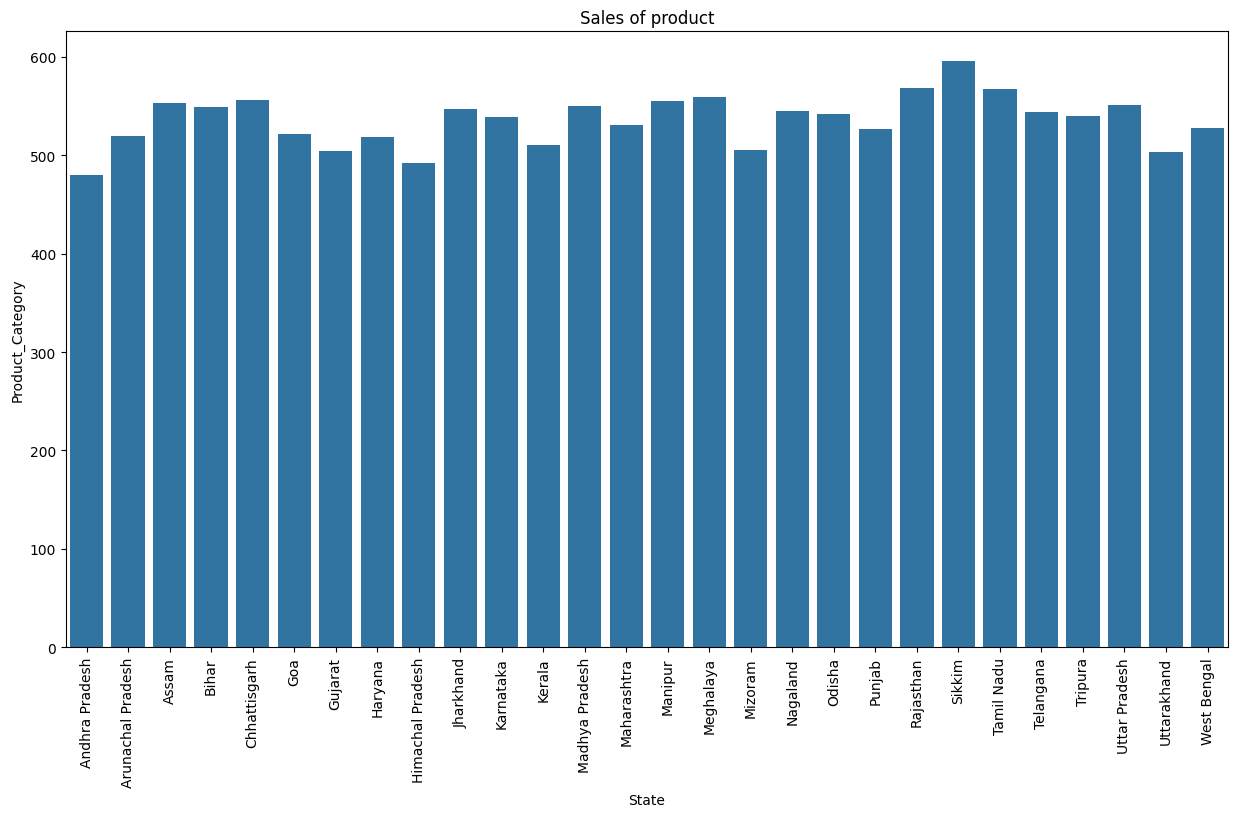

In [ ]:
#VISUALIZATION FOR WHICH STATE SALES MORE PRODUCT
plt.figure(figsize=(15,8))
sns.barplot(a)
plt.title("Sales of product")
plt.xlabel("State")
plt.ylabel("Product_Category")
plt.xticks(rotation=90)
plt.show()

OBSERVATION:


---

1. There are 28 State in dataset

2. Sikkim has the highest product sales

3. Second highest product sales is Rajasthan

4. least product sales is Andrapradhesh

In [ ]:
#PRODUCT BASED ANALYSIS
#1.which catogry of product customer ordered most
b=data.groupby("Product_Category")["Order_ID"].count()
b

,Order_ID
Product_Category,
Beauty,2997
Books,3035
Clothing,3022
Electronics,3036
Home & Kitchen,2910


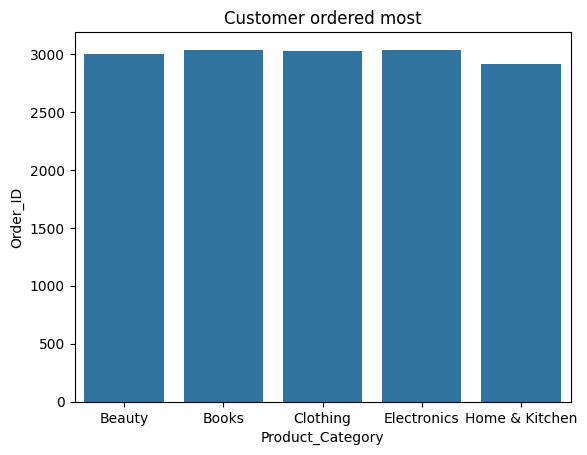

In [ ]:
#VISUALIZATION FOR WHICH CATOGORY OF PRODUCT CUSTOMER ORDERED MOST
sns.barplot(b)
plt.title("Customer ordered most")
plt.show()

OBSERVERSATION


---

1. There are 5 product cetegory they are Beauty,Books,Clothing,Electronics,Home & kitchen.

2. Electronic product has ordered most

3. Second largest product has Books

4. Others are average compare to others

In [ ]:
# 2.  which type of product can have more review rate?
review=data.groupby("Product_Name")["Review_Rating"].count()
review

,Review_Rating
Product_Name,
Air Fryer,614
Biography,579
Children's Book,636
Comics,597
Cookware Set,577
Face Cream,596
Fiction Novel,599
Hair Dryer,599
Headphones,610


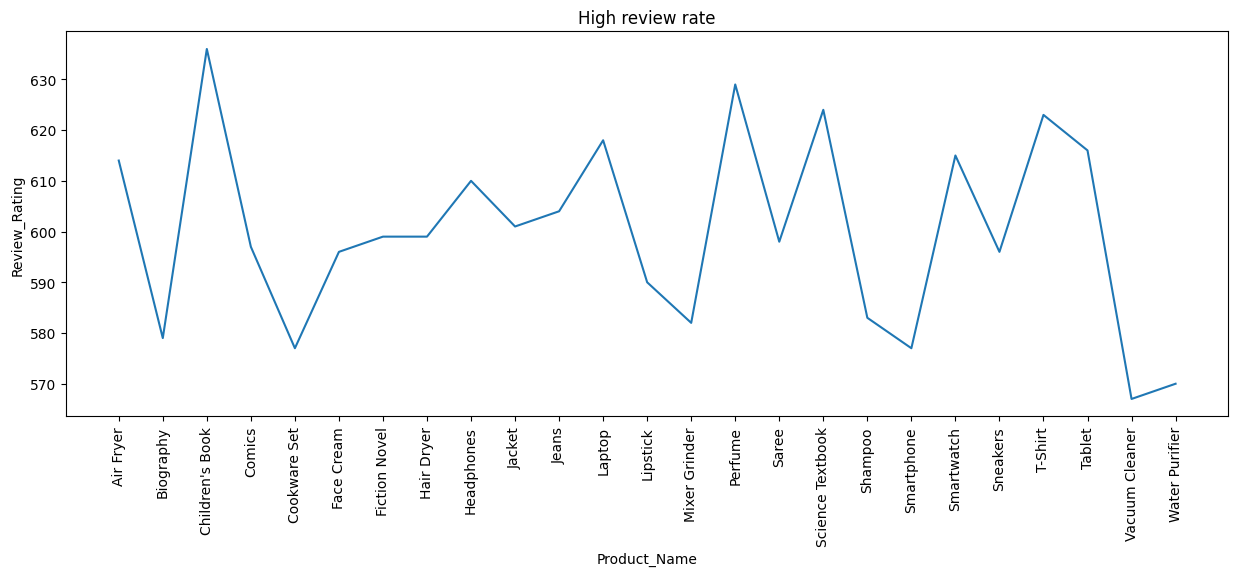

In [ ]:
#VISUALIZATION FOR WHICH TYPE OF PRODUCT CAN HAVE MORE REVIEW RATE
plt.figure(figsize=(15,5))
sns.lineplot(review)
plt.title("High review rate")
plt.xticks(rotation=90)
plt.show()

OBSERVATION:


---
1. There are 25 product in dataset

1. Children's book has the highest review rate

2. Vacuum cleaner has the most lowest review rate

3. Others are average review rate

In [ ]:
#3. Which type of product can customer ordered highest?
highest_order=data.groupby("Product_Category")["Quantity"].count()
highest_order

,Quantity
Product_Category,
Beauty,2997
Books,3035
Clothing,3022
Electronics,3036
Home & Kitchen,2910


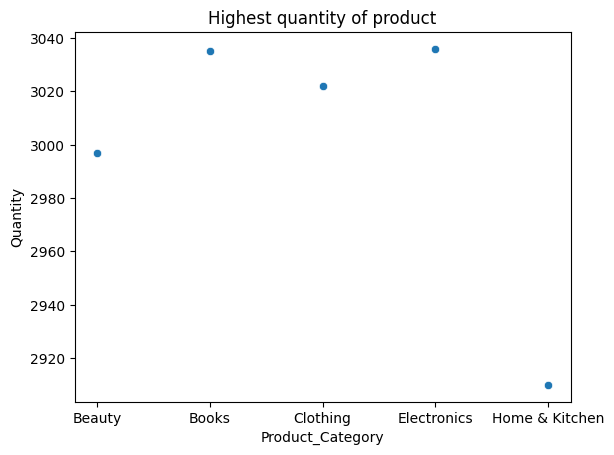

In [ ]:
#VISUALIZATION FOR WHICH TYPE OF PRODUCT CAN CUSTOMER ORDERED HIGHEST
sns.scatterplot(highest_order)
plt.title("Highest quantity of product")
plt.show()

OBSERVATION:


---

1. Compare to others Books and Electronic thus customer ordered highest

2. Home & Kitchen have least ordered

3. Beauty & Clothing have avarage ordered

In [ ]:
#4. which product has high price?
high_price=data.groupby("Product_Name")["Unit_Price_INR"].max()
high_price

,Unit_Price_INR
Product_Name,
Air Fryer,49916.82
Biography,49840.15
Children's Book,49824.23
Comics,49982.97
Cookware Set,49957.20
Face Cream,49897.75
Fiction Novel,49898.76
Hair Dryer,49937.45
Headphones,49847.68


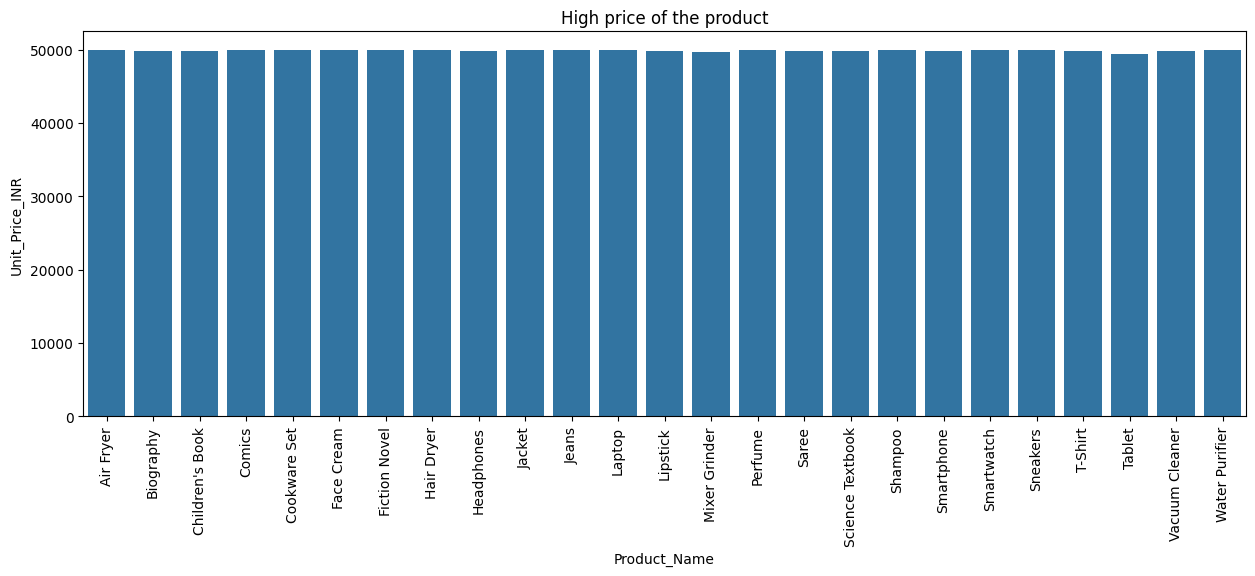

In [ ]:
#VISUALIZATION FOR HIGHEST PRODUCT PRICE
plt.figure(figsize=(15,5))
sns.barplot(high_price)
plt.title("High price of the product")
plt.xticks(rotation=90)
plt.show()

OBSERVATION:


---
1. Sneakers has highest unit price

2. Waterpurifier  also have high unit price compare to others

3. Mixer grinder has most least unit price

4. Others are average


In [ ]:
#5.which product has have low total sales?
total_sale=data.groupby("Product_Category")["Total_Sales_INR"].count()
total_sale

,Total_Sales_INR
Product_Category,
Beauty,2997
Books,3035
Clothing,3022
Electronics,3036
Home & Kitchen,2910


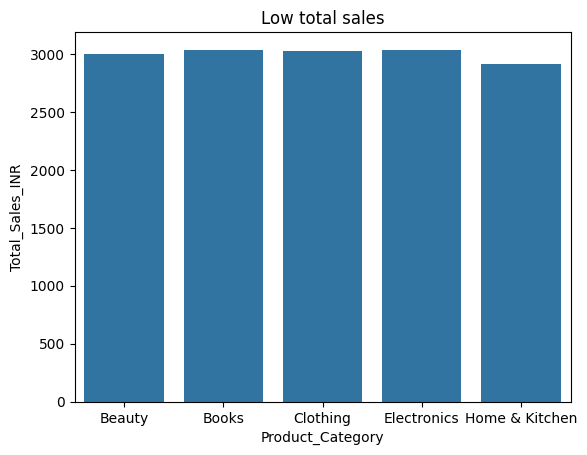

In [ ]:
#VISUALIZATION FOR LOW TOTAL SALE
sns.barplot(total_sale)
plt.title("Low total sales")
plt.show()

OBSERVATION:


---

1. Home & Kitchen has the lowest total sale

2. Electronics has highest total sale

3. Others are average

In [ ]:
#6.which product has most fair deal
review=data.groupby("Review_Text").get_group("Fair deal")
a=review.groupby("Product_Category")["Review_Text"].count()
a

,Review_Text
Product_Category,
Beauty,122
Books,108
Clothing,132
Electronics,100
Home & Kitchen,118


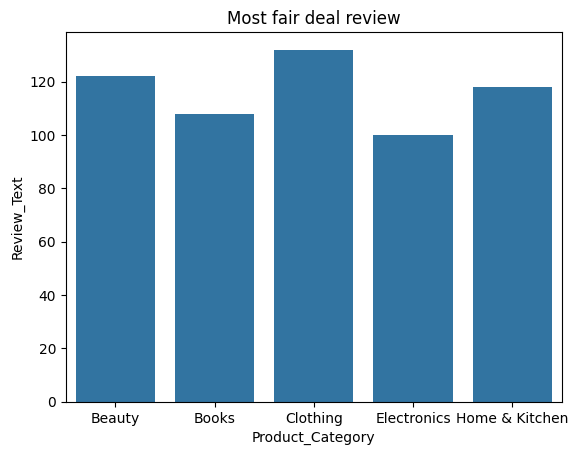

In [ ]:
#VISUALIZATION FOR MOST FAIR PRODUCT
sns.barplot(a)
plt.title("Most fair deal review")
plt.show()

OBSERVATION


---
1. There are 5 product in dataset they are Beauty , Books , Clothing , Electronics , Home & Kitchen  

2. Clothing product has the most fair deal

3. Electronics product has least fair deal


In [ ]:
#7. How many clothing product can sold above 5 quantity
sales=data[(data["Product_Category"]=="Clothing")&(data["Quantity"]==5)]
a=sales.groupby("Product_Category")["Quantity"].count()
a

,Quantity
Product_Category,
Clothing,577


OBSERVATION


---

1. 577 Quantity of clothing product has sold

In [ ]:
#8. How many home & kitchen product has above 5 review rate?
review=data[(data["Product_Category"]=="Home & Kitchen")&(data["Review_Rating"]==5)]
a=review.groupby("Product_Category")["Review_Rating"].count()
a

,Review_Rating
Product_Category,
Home & Kitchen,625


OBSERVATION


---
1. 625 Home & Kitchen product has above 5 review rate


In [ ]:
#PAYMENT BASED ANALYSIS
#1.how many customer can purchase the product through upi?
payment=data.groupby("Payment_Method").get_group("UPI")
a=payment.groupby("Payment_Method").count()
a


,Order_ID,Date,Customer_ID,Product_Category,Product_Name,Quantity,Unit_Price_INR,Total_Sales_INR,Delivery_Status,Review_Rating,Review_Text,State,Country
Payment_Method,,,,,,,,,,,,,
UPI,3646,3646,3646,3646,3646,3646,3646,3646,3646,3646,3646,3646,3646


OBSERVATION


---

1. 3646 customers can purchase the product through upi

In [ ]:
#2.how many product can delivered and return ?
a=data.groupby("Delivery_Status")["Delivery_Status"].count()
a

,Delivery_Status
Delivery_Status,
Delivered,5075
Pending,5044
Returned,4881


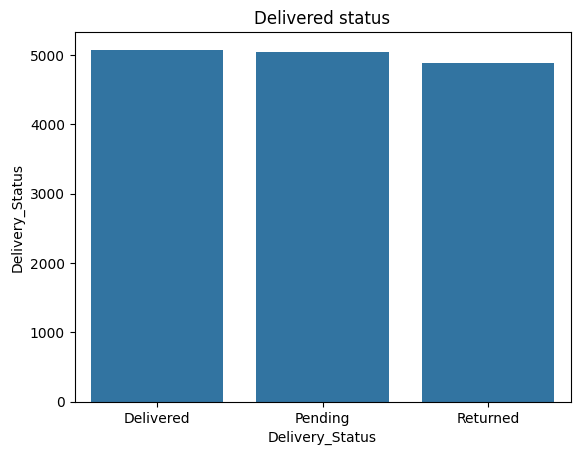

In [ ]:
#VISUALIZATION FOR DELIVERED STATUS
sns.barplot(a)
plt.title("Delivered status")
plt.show()

OBSERVERTION


---

1. 5075 Product has delivered

2. 4881 product has returned

3. 5044 product has pending

In [ ]:
#3. how many product can have excellent review rate
review=data.groupby("Review_Text").get_group("Excellent product!")
review.groupby("Review_Text").count()

,Order_ID,Date,Customer_ID,Product_Category,Product_Name,Quantity,Unit_Price_INR,Total_Sales_INR,Payment_Method,Delivery_Status,Review_Rating,State,Country
Review_Text,,,,,,,,,,,,,
Excellent product!,653,653,653,653,653,653,653,653,653,653,653,653,653


OBSERVATION


---

1. 653 products are excellent review rate

In [ ]:
# 4 how many beauty product has return ?
beauty=data.groupby("Product_Category").get_group("Beauty")
a=beauty.groupby("Delivery_Status").get_group("Returned")
b=a.groupby("Product_Category")["Delivery_Status"].count()
b

,Delivery_Status
Product_Category,
Beauty,954


OBSERVATION


---

1. 954 Beauty product has return

In [ ]:
#5.Which product have the highest return rate?
a=data.groupby("Delivery_Status").get_group("Returned")
b=a.groupby("Product_Category")["Delivery_Status"].count()
b

,Delivery_Status
Product_Category,
Beauty,954
Books,1029
Clothing,982
Electronics,1006
Home & Kitchen,910


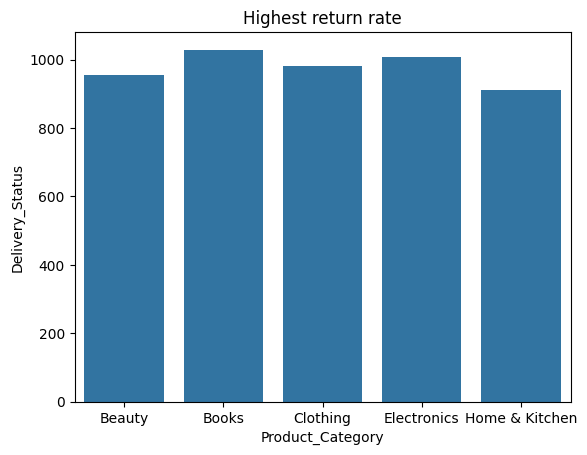

In [ ]:
#VISUALIZATION FOR WHICH PRODUCT HAVE THE HIGHEST RETURN RATE
sns.barplot(b)
plt.title("Highest return rate")
plt.show()

OBSERVATION


---
1. 1029 Books were  returned

2. Second highest 1006 Electronics were returned


In [ ]:
#6. Which payment method is used most frequently?
payment=data.groupby("Payment_Method")["Payment_Method"].count()
payment

,Payment_Method
Payment_Method,
Cash on Delivery,3827
Credit Card,3800
Debit Card,3727
UPI,3646


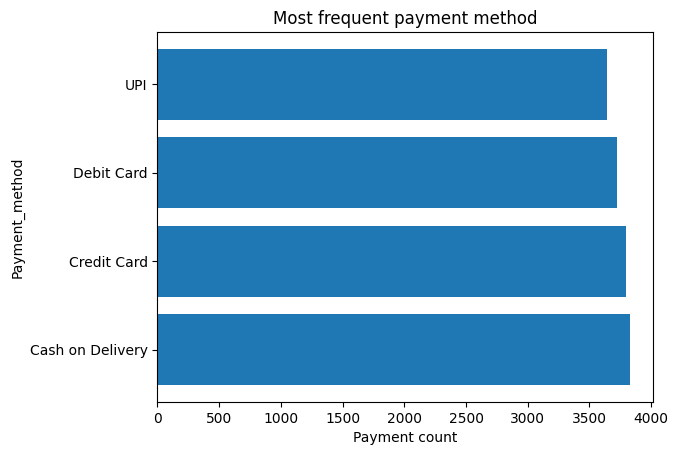

In [ ]:
#VISUALIZATION FOR WHICH PAYMENT METHOD IS USED MOST FREQUENTLY
plt.barh(payment.index,payment.values)
plt.xlabel("Payment count")
plt.ylabel("Payment_method")
plt.title("Most frequent payment method")
plt.show()

OBSERVATION


---
1. Most frequent payment method is cash on delivery

2. 3827 Customer pay cash on delivery

3. 3800 Customer pay through credit card

4. 3727 Customer pay through debit card

5. 3646 Customer pay through upi

In [ ]:
#7. What is the total sales for each payment method ?
sales=data.groupby("Payment_Method")["Total_Sales_INR"].count()
sales

,Total_Sales_INR
Payment_Method,
Cash on Delivery,3827
Credit Card,3800
Debit Card,3727
UPI,3646


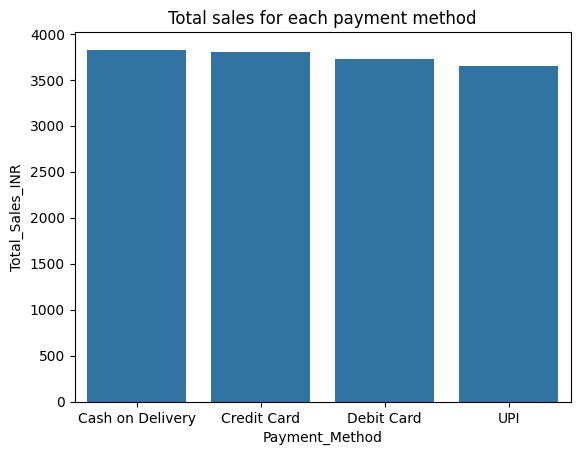

In [ ]:
#VISUALIZATION FOR TOTAL SALES FOR EACH PAYMENT METHOD
sns.barplot(sales)
plt.title("Total sales for each payment method")
plt.show()

OBSERVATION


---

1. Cash on delivery has the high total sales

2. Credit card has the second largest total sales compare to others

3. UPI has least total sales

In [ ]:
#REGION BASED ANALYSIS
#1. How many lipstick product can delivered in sikkim
sales=data[(data["Product_Name"]=="Lipstick")&(data["State"]=="Sikkim")&(data["Delivery_Status"]=="Delivered")]
a=sales.groupby("Product_Name")["Delivery_Status"].count()
a

,Delivery_Status
Product_Name,
Lipstick,12


OBSERVATION


---

1. 12 Lipstick product can delivered in sikkim state

In [ ]:
#2.how many product can sold in assam ?
sales=data.groupby("State").get_group("Assam")
a=sales.groupby("State")["Total_Sales_INR"].count()
a

,Total_Sales_INR
State,
Assam,553


OBSERVATION


---

1. 553 product has sold in Assam

In [ ]:
#3.How many electronics products are sales in tamilnadu?
a=data[(data['State']=="Tamil Nadu")&(data["Product_Category"]=="Electronics")]
b=a.groupby("State")["Product_Category"].count()
b

,Product_Category
State,
Tamil Nadu,115


OBSERVATION


---

1. 115 Electronic product has sold in Tamilnadu

In [ ]:
#DATE WISE ANALYSIS
#1.how many product can sold in same date ?
a=data.groupby("Product_Category")["Date"].count()
a

,Date
Product_Category,
Beauty,2997
Books,3035
Clothing,3022
Electronics,3036
Home & Kitchen,2910


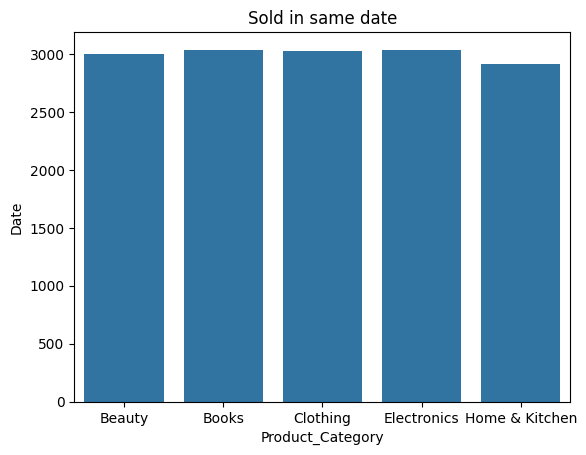

In [ ]:
sns.barplot(a)
plt.title("Sold in same date")
plt.show()

OBSERVATION


---

1. 2997  Beauty Product can sold in same date

2. 3035 Books product can sold in same date

3. 3022 Clothing product can sold in same date

4. 3036 Electronic product can sold in same date

5. 2910 Home & Kitchen product can sold in same date